In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [171]:
df=pd.read_excel('Airlines+Data.xlsx')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [172]:
df.shape

(96, 2)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [174]:
df.duplicated().sum()

0

In [175]:
df['NO']=np.arange(1,97)
df['month']=df['Month'].dt.strftime('%b')
df['year']=df['Month'].dt.strftime('%y')

In [176]:
mon=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

a=df['month'][0]
a[0:3]
df['mon']=0

for i in range (96):
    a=df['month'][i]
    df['mon'][i]=a[0:3]
    
df

,Month,Passengers,NO,month,year,mon
0,1995-01-01,112,1,Jan,95,Jan
1,1995-02-01,118,2,Feb,95,Feb
2,1995-03-01,132,3,Mar,95,Mar
3,1995-04-01,129,4,Apr,95,Apr
4,1995-05-01,121,5,May,95,May
...,...,...,...,...,...,...
91,2002-08-01,405,92,Aug,02,Aug
92,2002-09-01,355,93,Sep,02,Sep
93,2002-10-01,306,94,Oct,02,Oct
94,2002-11-01,271,95,Nov,02,Nov


In [177]:
df['mon'].value_counts()

Jan    8
Feb    8
Mar    8
Apr    8
May    8
Jun    8
Jul    8
Aug    8
Sep    8
Oct    8
Nov    8
Dec    8
Name: mon, dtype: int64

In [178]:
dummies=pd.get_dummies(df['mon'])
dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [179]:
df1=pd.concat([df,dummies],axis=1)
df1

,Month,Passengers,NO,month,year,mon,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1,Jan,95,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,Feb,95,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,Mar,95,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,Apr,95,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,May,95,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,Aug,02,Aug,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,93,Sep,02,Sep,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,94,Oct,02,Oct,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,95,Nov,02,Nov,0,0,0,0,0,0,0,0,0,1,0,0


In [180]:
df1['No_squared']=df1['NO']*df1['NO']

In [181]:
df1['log_Passenger']=np.log(df1['Passengers'])

In [182]:
df1.head()

,Month,Passengers,NO,month,year,mon,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,No_squared,log_Passenger
0,1995-01-01,112,1,Jan,95,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,4.718499
1,1995-02-01,118,2,Feb,95,Feb,0,0,0,1,0,0,0,0,0,0,0,0,4,4.770685
2,1995-03-01,132,3,Mar,95,Mar,0,0,0,0,0,0,0,1,0,0,0,0,9,4.882802
3,1995-04-01,129,4,Apr,95,Apr,1,0,0,0,0,0,0,0,0,0,0,0,16,4.859812
4,1995-05-01,121,5,May,95,May,0,0,0,0,0,0,0,0,1,0,0,0,25,4.795791


In [183]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          96 non-null     datetime64[ns]
 1   Passengers     96 non-null     int64         
 2   NO             96 non-null     int32         
 3   month          96 non-null     object        
 4   year           96 non-null     object        
 5   mon            96 non-null     object        
 6   Apr            96 non-null     uint8         
 7   Aug            96 non-null     uint8         
 8   Dec            96 non-null     uint8         
 9   Feb            96 non-null     uint8         
 10  Jan            96 non-null     uint8         
 11  Jul            96 non-null     uint8         
 12  Jun            96 non-null     uint8         
 13  Mar            96 non-null     uint8         
 14  May            96 non-null     uint8         
 15  Nov            96 non-nul

In [184]:
df1.shape

(96, 20)

In [185]:
Train=df1.head(76)
Test=df1.tail(20)

In [186]:
Train

,Month,Passengers,NO,month,year,mon,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,No_squared,log_Passenger
0,1995-01-01,112,1,Jan,95,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,4.718499
1,1995-02-01,118,2,Feb,95,Feb,0,0,0,1,0,0,0,0,0,0,0,0,4,4.770685
2,1995-03-01,132,3,Mar,95,Mar,0,0,0,0,0,0,0,1,0,0,0,0,9,4.882802
3,1995-04-01,129,4,Apr,95,Apr,1,0,0,0,0,0,0,0,0,0,0,0,16,4.859812
4,1995-05-01,121,5,May,95,May,0,0,0,0,0,0,0,0,1,0,0,0,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2000-12-01,229,72,Dec,00,Dec,0,0,1,0,0,0,0,0,0,0,0,0,5184,5.433722
72,2001-01-01,242,73,Jan,01,Jan,0,0,0,0,1,0,0,0,0,0,0,0,5329,5.488938
73,2001-02-01,233,74,Feb,01,Feb,0,0,0,1,0,0,0,0,0,0,0,0,5476,5.451038
74,2001-03-01,267,75,Mar,01,Mar,0,0,0,0,0,0,0,1,0,0,0,0,5625,5.587249


In [187]:
Test

,Month,Passengers,NO,month,year,mon,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,No_squared,log_Passenger
76,2001-05-01,270,77,May,01,May,0,0,0,0,0,0,0,0,1,0,0,0,5929,5.598422
77,2001-06-01,315,78,Jun,01,Jun,0,0,0,0,0,0,1,0,0,0,0,0,6084,5.752573
78,2001-07-01,364,79,Jul,01,Jul,0,0,0,0,0,1,0,0,0,0,0,0,6241,5.897154
79,2001-08-01,347,80,Aug,01,Aug,0,1,0,0,0,0,0,0,0,0,0,0,6400,5.849325
80,2001-09-01,312,81,Sep,01,Sep,0,0,0,0,0,0,0,0,0,0,0,1,6561,5.743003
81,2001-10-01,274,82,Oct,01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,6724,5.613128
82,2001-11-01,237,83,Nov,01,Nov,0,0,0,0,0,0,0,0,0,1,0,0,6889,5.468060
83,2001-12-01,278,84,Dec,01,Dec,0,0,1,0,0,0,0,0,0,0,0,0,7056,5.627621
84,2002-01-01,284,85,Jan,02,Jan,0,0,0,0,1,0,0,0,0,0,0,0,7225,5.648974
85,2002-02-01,277,86,Feb,02,Feb,0,0,0,1,0,0,0,0,0,0,0,0,7396,5.624018


In [188]:
Test

,Month,Passengers,NO,month,year,mon,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,No_squared,log_Passenger
76,2001-05-01,270,77,May,01,May,0,0,0,0,0,0,0,0,1,0,0,0,5929,5.598422
77,2001-06-01,315,78,Jun,01,Jun,0,0,0,0,0,0,1,0,0,0,0,0,6084,5.752573
78,2001-07-01,364,79,Jul,01,Jul,0,0,0,0,0,1,0,0,0,0,0,0,6241,5.897154
79,2001-08-01,347,80,Aug,01,Aug,0,1,0,0,0,0,0,0,0,0,0,0,6400,5.849325
80,2001-09-01,312,81,Sep,01,Sep,0,0,0,0,0,0,0,0,0,0,0,1,6561,5.743003
81,2001-10-01,274,82,Oct,01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,6724,5.613128
82,2001-11-01,237,83,Nov,01,Nov,0,0,0,0,0,0,0,0,0,1,0,0,6889,5.468060
83,2001-12-01,278,84,Dec,01,Dec,0,0,1,0,0,0,0,0,0,0,0,0,7056,5.627621
84,2002-01-01,284,85,Jan,02,Jan,0,0,0,0,1,0,0,0,0,0,0,0,7225,5.648974
85,2002-02-01,277,86,Feb,02,Feb,0,0,0,1,0,0,0,0,0,0,0,0,7396,5.624018


<AxesSubplot:xlabel='month', ylabel='Passengers'>

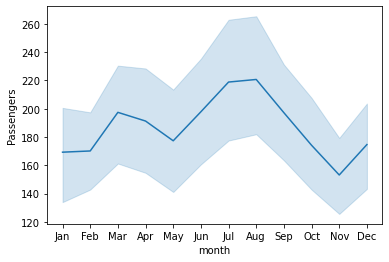

In [209]:
sns.lineplot(x=Train['month'],y=Train['Passengers'])

<AxesSubplot:xlabel='year', ylabel='Passengers'>

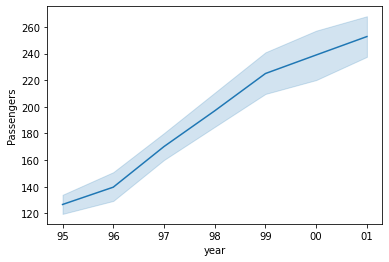

In [216]:
sns.lineplot(x=Train['year'],y=Train['Passengers'])

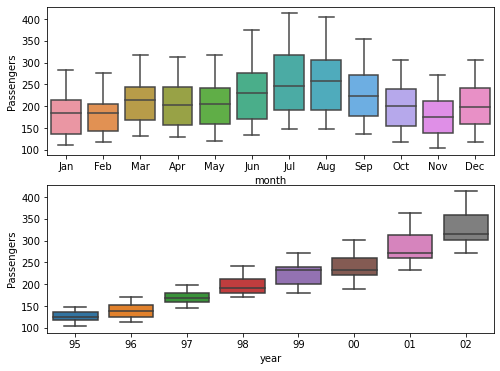

In [215]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='month',y='Passengers',data=df1)
plt.subplot(212)
sns.boxplot(x='year',y='Passengers',data=df1)
plt.show()

## Model Building

In [189]:
# Linear Regression Model
import statsmodels.formula.api as smf

In [190]:
linear_model=smf.ols('Passengers~NO',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['NO'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

57.00014788256589

In [191]:
# Exponential model
expo=smf.ols('log_Passenger~NO',data=Train).fit()
pred_expo=pd.Series(expo.predict(pd.DataFrame(Test['NO'])))
rmse_expo=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_expo)))**2))
rmse_expo

46.62154394719396

In [192]:
# Quadratic model
quad=smf.ols('Passengers~NO+No_squared',data=Train).fit()
pred_quad=pd.Series(quad.predict(Test[['NO','No_squared']]))
rmse_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

58.49427463947509

In [193]:
# Additive Seasonality
add_sea=smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
pred_add_sea=pd.Series(add_sea.predict(Test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.25413439949475

In [194]:
# Additive Seasonality by Quadratic
add_sea_quad=smf.ols('Passengers~NO+No_squared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_quad.predict(Test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep','NO','No_squared']]))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

39.75976633806191

In [195]:
# Multiplicative seasonlality
Multi_sea=smf.ols('log_Passenger~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
pred_Multi_sea=pd.Series(Multi_sea.predict(Test))
rmse_Multi_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Multi_sea)))**2))
rmse_Multi_sea

137.61090856256482

In [196]:
# Multiplicative Additive Seasonality
Multi_Add_sea=smf.ols('log_Passenger~NO+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
pred_Multi_Add_sea=pd.Series(Multi_Add_sea.predict(Test))
rmse_Multi_Add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Multi_Add_sea)))**2))
rmse_Multi_Add_sea

11.784250178871426

In [197]:
df2={'Model':pd.Series(['rmse_linear','rmse_expo','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_Multi_sea','rmse_Multi_Add_sea']),
    'RMSE_Values':pd.Series([rmse_linear,rmse_expo,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_Multi_sea,rmse_Multi_Add_sea])}
table_rmse=pd.DataFrame(df2)
table_rmse

,Model,RMSE_Values
0,rmse_linear,57.000148
1,rmse_expo,46.621544
2,rmse_quad,58.494275
3,rmse_add_sea,132.254134
4,rmse_add_sea_quad,39.759766
5,rmse_Multi_sea,137.610909
6,rmse_Multi_Add_sea,11.784250


In [198]:
# Prediction using multiplicative additive sasonality

In [199]:
df3=[['Jan','2003'],['Feb','2003'],['Mar','2003'],['Apr','2003'],['May','2003'],['Jun','2003'],['Jul','2003'],['Aug','2003'],['Sep','2003'],['Oct','2003'],['Nov','2003'],['Dec','2003'],['Jan','2004'],['Feb','2004'],['Mar','2004'],['Apr','2004'],['May','2004'],['Jun','2004'],['Jul','2004'],['Aug','2004'],['Sep','2004'],['Oct','2004'],['Nov','2004'],['Dec','2004']]
print(df3)

df4=pd.DataFrame(df3,columns=['month','year'])
df4

[['Jan', '2003'], ['Feb', '2003'], ['Mar', '2003'], ['Apr', '2003'], ['May', '2003'], ['Jun', '2003'], ['Jul', '2003'], ['Aug', '2003'], ['Sep', '2003'], ['Oct', '2003'], ['Nov', '2003'], ['Dec', '2003'], ['Jan', '2004'], ['Feb', '2004'], ['Mar', '2004'], ['Apr', '2004'], ['May', '2004'], ['Jun', '2004'], ['Jul', '2004'], ['Aug', '2004'], ['Sep', '2004'], ['Oct', '2004'], ['Nov', '2004'], ['Dec', '2004']]


,month,year
0,Jan,2003
1,Feb,2003
2,Mar,2003
3,Apr,2003
4,May,2003
5,Jun,2003
6,Jul,2003
7,Aug,2003
8,Sep,2003
9,Oct,2003


In [200]:
dummies1=pd.get_dummies(df4['month'])

In [201]:
df5=pd.concat([df4,dummies1],axis=1)

In [202]:
df5

,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan,2003,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb,2003,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar,2003,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr,2003,1,0,0,0,0,0,0,0,0,0,0,0
4,May,2003,0,0,0,0,0,0,0,0,1,0,0,0
5,Jun,2003,0,0,0,0,0,0,1,0,0,0,0,0
6,Jul,2003,0,0,0,0,0,1,0,0,0,0,0,0
7,Aug,2003,0,1,0,0,0,0,0,0,0,0,0,0
8,Sep,2003,0,0,0,0,0,0,0,0,0,0,0,1
9,Oct,2003,0,0,0,0,0,0,0,0,0,0,1,0


In [203]:
df5['NO']=np.arange(1,25)
df5['No_sqaured']=df5['NO']*df5['NO']
df5

,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,NO,No_sqaured
0,Jan,2003,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,Feb,2003,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,Mar,2003,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,Apr,2003,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,May,2003,0,0,0,0,0,0,0,0,1,0,0,0,5,25
5,Jun,2003,0,0,0,0,0,0,1,0,0,0,0,0,6,36
6,Jul,2003,0,0,0,0,0,1,0,0,0,0,0,0,7,49
7,Aug,2003,0,1,0,0,0,0,0,0,0,0,0,0,8,64
8,Sep,2003,0,0,0,0,0,0,0,0,0,0,0,1,9,81
9,Oct,2003,0,0,0,0,0,0,0,0,0,0,1,0,10,100


In [204]:
model_final=smf.ols('log_Passenger~NO+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
pred_new=pd.Series(model_final.predict(df5))
pred_new


0     4.697298
1     4.712892
2     4.857256
3     4.821524
4     4.813365
5     4.925762
6     5.026806
7     5.035215
8     4.927912
9     4.800831
10    4.671319
11    4.806544
12    4.829961
13    4.845554
14    4.989918
15    4.954187
16    4.946028
17    5.058425
18    5.159468
19    5.167878
20    5.060574
21    4.933493
22    4.803982
23    4.939206
dtype: float64

In [205]:
np.exp(pred_new)

0     109.650533
1     111.373746
2     128.670593
3     124.154175
4     123.145318
5     137.794321
6     152.445262
7     153.732656
8     138.090848
9     121.611417
10    106.838603
11    122.308159
12    125.206056
13    127.173732
14    146.924388
15    141.767251
16    140.615273
17    157.342449
18    174.071840
19    175.541869
20    157.681044
21    138.863765
22    121.995213
23    139.659350
dtype: float64

In [206]:
df5['Forecasted_passengers']=pd.Series(np.exp(pred_new))

In [207]:
Final_predict=df5.loc[:,['month','year','Forecasted_passengers']]
Final_predict

,month,year,Forecasted_passengers
0,Jan,2003,109.650533
1,Feb,2003,111.373746
2,Mar,2003,128.670593
3,Apr,2003,124.154175
4,May,2003,123.145318
5,Jun,2003,137.794321
6,Jul,2003,152.445262
7,Aug,2003,153.732656
8,Sep,2003,138.090848
9,Oct,2003,121.611417


<AxesSubplot:xlabel='month', ylabel='Forecasted_passengers'>

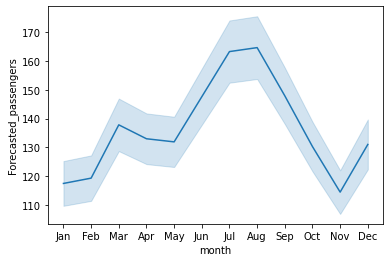

In [208]:
sns.lineplot(x=df['month'],y=df5['Forecasted_passengers'])
